<a href="https://colab.research.google.com/github/Kakumanu-Harshitha/SCT_DS_4/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings("ignore")


# 2. Load the Dataset

In [ ]:
df = pd.read_csv("acc_16.csv")
print("Loaded data shape:", df.shape)
df.head()

Loaded data shape: (46511, 51)


,CASENUM,PSU,PJ,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERMVIT,PERNOTMVIT,...,LGTCON_IM,WEATHR_IM,MAXSEV_IM,NO_INJ_IM,ALCHL_IM,URBANICITY,REGION,PSUSTRAT,PSU_VAR,WEIGHT
0,201600014311,44,388,9,2,2,0,0,2,0,...,1,1,0,0,2,2,4,25,44,219.795475
1,201600014315,44,388,8,2,2,0,0,4,0,...,3,1,1,4,2,2,4,25,44,186.634758
2,201600014316,44,388,5,1,1,0,0,1,0,...,3,1,3,1,2,2,4,25,44,32.222550
3,201600014335,44,388,10,2,2,0,0,2,0,...,3,3,0,0,2,2,4,25,44,317.681532
4,201600014586,24,170,2,1,1,0,1,1,1,...,1,1,2,1,2,2,4,24,24,37.251626


# 3. Data Preprocessing

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46511 entries, 0 to 46510
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CASENUM     46511 non-null  int64  
 1   PSU         46511 non-null  int64  
 2   PJ          46511 non-null  int64  
 3   STRATUM     46511 non-null  int64  
 4   VE_TOTAL    46511 non-null  int64  
 5   VE_FORMS    46511 non-null  int64  
 6   PVH_INVL    46511 non-null  int64  
 7   PEDS        46511 non-null  int64  
 8   PERMVIT     46511 non-null  int64  
 9   PERNOTMVIT  46511 non-null  int64  
 10  NUM_INJ     46511 non-null  int64  
 11  MONTH       46511 non-null  int64  
 12  YEAR        46511 non-null  int64  
 13  DAY_WEEK    46511 non-null  int64  
 14  HOUR        46511 non-null  int64  
 15  MINUTE      46511 non-null  int64  
 16  HARM_EV     46511 non-null  int64  
 17  ALCOHOL     46511 non-null  int64  
 18  MAX_SEV     46511 non-null  int64  
 19  MAN_COLL    46511 non-nul

,CASENUM,PSU,PJ,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERMVIT,PERNOTMVIT,...,LGTCON_IM,WEATHR_IM,MAXSEV_IM,NO_INJ_IM,ALCHL_IM,URBANICITY,REGION,PSUSTRAT,PSU_VAR,WEIGHT
count,4.651100e+04,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,...,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000
mean,2.016005e+11,44.719443,1347.937563,7.229602,1.814969,1.766227,0.048741,0.085915,2.438240,0.093612,...,1.577541,2.570510,0.996108,0.792479,1.940294,1.248414,2.750425,12.630324,46.712563,146.656253
std,2.620586e+05,18.314777,994.650630,2.521382,0.653581,0.649184,0.263875,0.292039,1.485343,0.315595,...,1.030768,3.241848,1.162023,1.004280,0.236944,0.432098,0.811031,5.815995,25.979351,108.840715
min,2.016000e+11,10.000000,46.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.861913
25%,2.016003e+11,31.000000,464.000000,6.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,8.000000,31.000000,54.086403
50%,2.016005e+11,41.000000,1078.000000,8.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,13.000000,41.000000,142.958641
75%,2.016007e+11,59.000000,2087.000000,9.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,16.000000,60.000000,204.297900
max,2.016010e+11,82.000000,4036.000000,10.000000,11.000000,8.000000,9.000000,6.000000,24.000000,6.000000,...,7.000000,12.000000,8.000000,16.000000,2.000000,2.000000,4.000000,25.000000,206.000000,994.507448


In [ ]:
#  Handle Missing Values
missing = df.isnull().sum() / len(df) * 100
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with Missing Values:\n", missing)



Columns with Missing Values:
 Series([], dtype: float64)


In [ ]:
print(df.columns.tolist())

['CASENUM', 'PSU', 'PJ', 'STRATUM', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS', 'PERMVIT', 'PERNOTMVIT', 'NUM_INJ', 'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'HARM_EV', 'ALCOHOL', 'MAX_SEV', 'MAN_COLL', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2', 'WEATHER', 'SCH_BUS', 'INT_HWY', 'CF1', 'CF2', 'CF3', 'WKDY_IM', 'HOUR_IM', 'MINUTE_IM', 'EVENT1_IM', 'MANCOL_IM', 'RELJCT1_IM', 'RELJCT2_IM', 'LGTCON_IM', 'WEATHR_IM', 'MAXSEV_IM', 'NO_INJ_IM', 'ALCHL_IM', 'URBANICITY', 'REGION', 'PSUSTRAT', 'PSU_VAR', 'WEIGHT']


In [ ]:
#  Select relevant columns for analysis
columns_to_keep = [
    'YEAR', 'MONTH', 'DAY_WEEK', 'HOUR', 'MINUTE',
    'MAX_SEV', 'NUM_INJ', 'PERMVIT',
    'LGT_COND', 'WEATHER1', 'WEATHER2', 'WEATHER',
    'WRK_ZONE', 'REL_ROAD',
    'URBANICITY', 'REGION'
]

In [ ]:
# Filter only existing columns
columns_to_keep = [col for col in columns_to_keep if col in df.columns]

#  Create new DataFrame with only needed columns
df = df[columns_to_keep]

# 4. Exploratory Data Analysis (EDA)

# a.Accident Severity Distribution

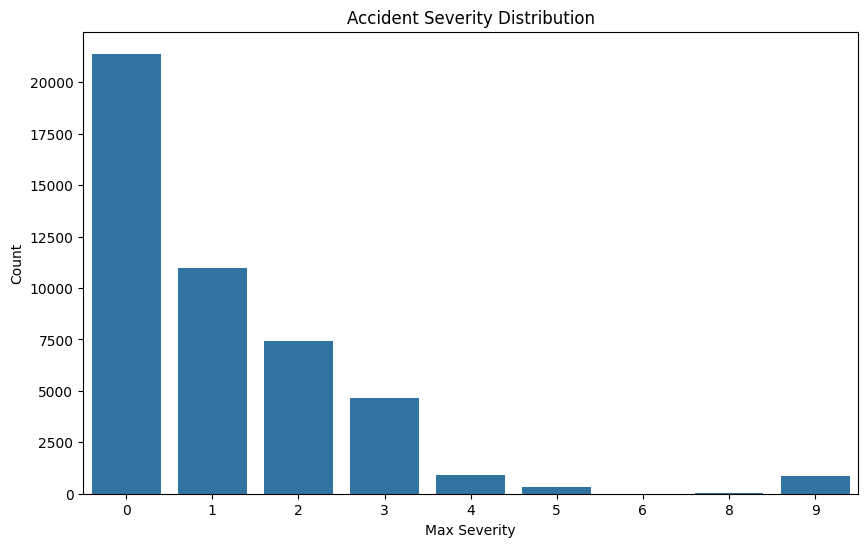

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MAX_SEV')
plt.title('Accident Severity Distribution')
plt.xlabel('Max Severity')
plt.ylabel('Count')
plt.show()

# b.Time of Day Analysis

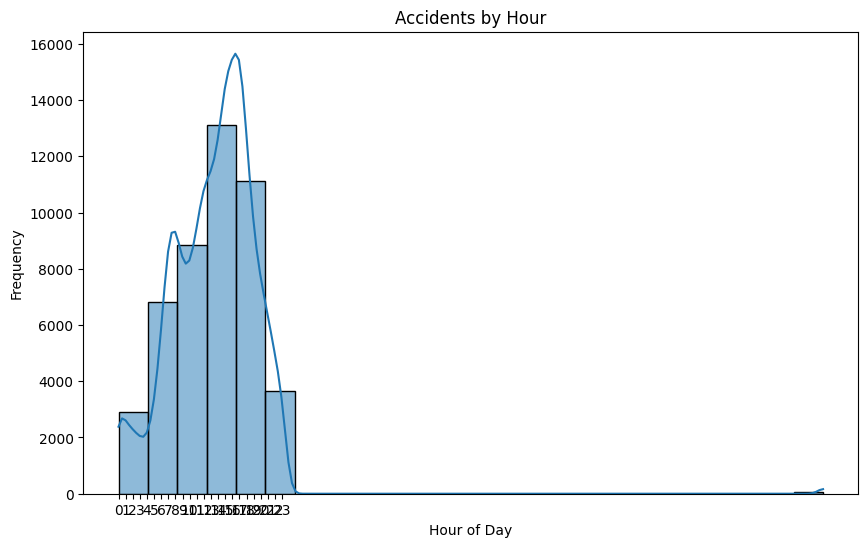

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['HOUR'], bins=24, kde=True)
plt.title('Accidents by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.show()

# c. Weather Condition Distribution

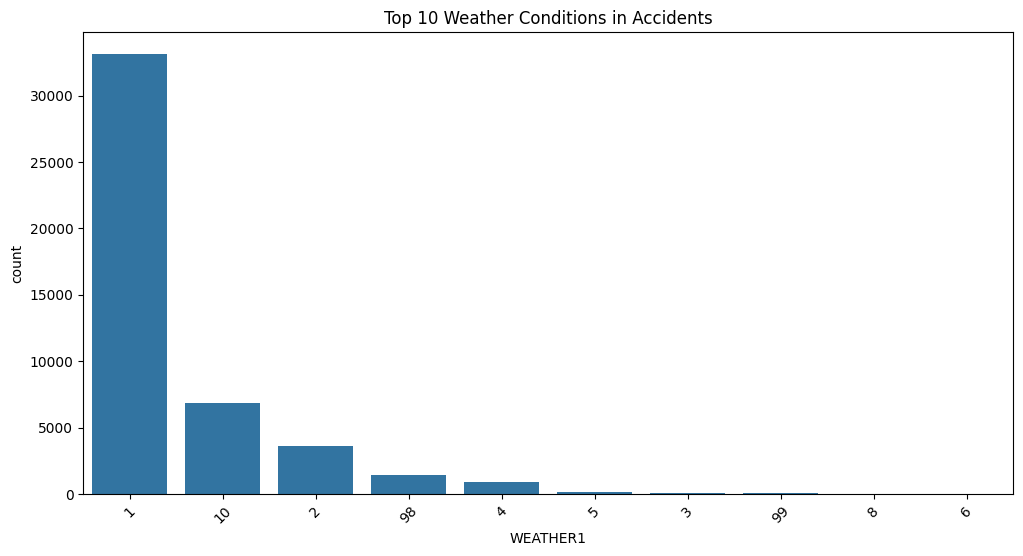

In [ ]:
if 'WEATHER1' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='WEATHER1', order=df['WEATHER1'].value_counts().index[:10])
    plt.xticks(rotation=45)
    plt.title('Top 10 Weather Conditions in Accidents')
    plt.show()


# d.Light Condition Distribution

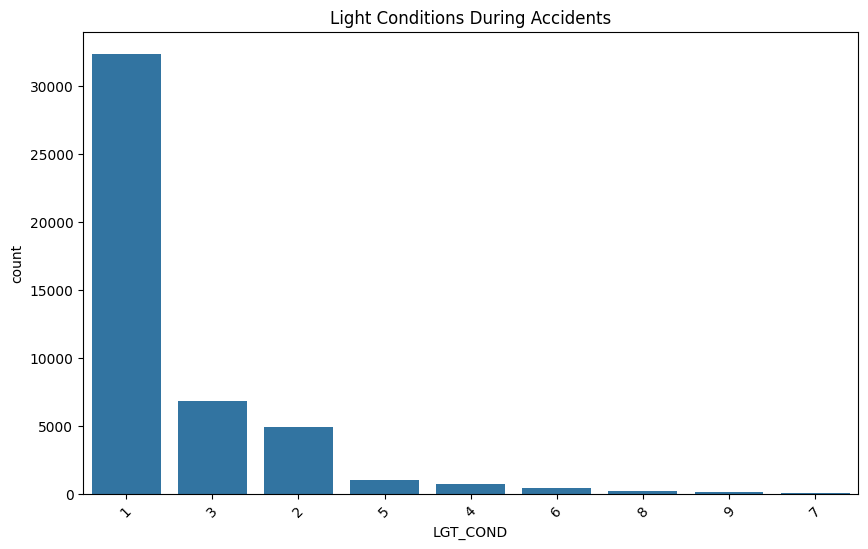

In [ ]:
if 'LGT_COND' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='LGT_COND', order=df['LGT_COND'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title('Light Conditions During Accidents')
    plt.show()

# e.Heatmap of accident frequency by hour and weekday

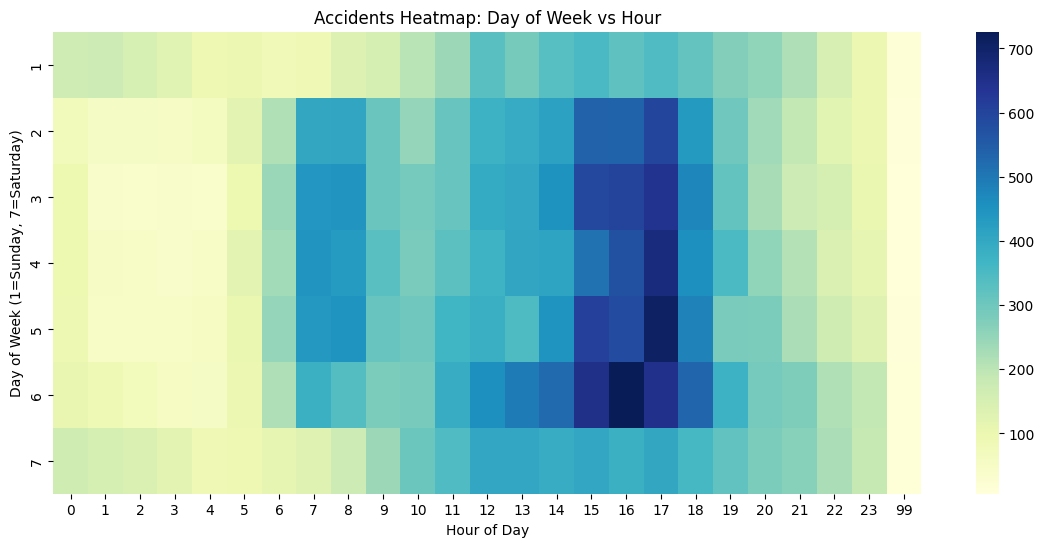

In [ ]:
pivot_table = df.pivot_table(index='DAY_WEEK', columns='HOUR', values='MAX_SEV', aggfunc='count')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Accidents Heatmap: Day of Week vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (1=Sunday, 7=Saturday)')
plt.show()

# f. Accidents per region

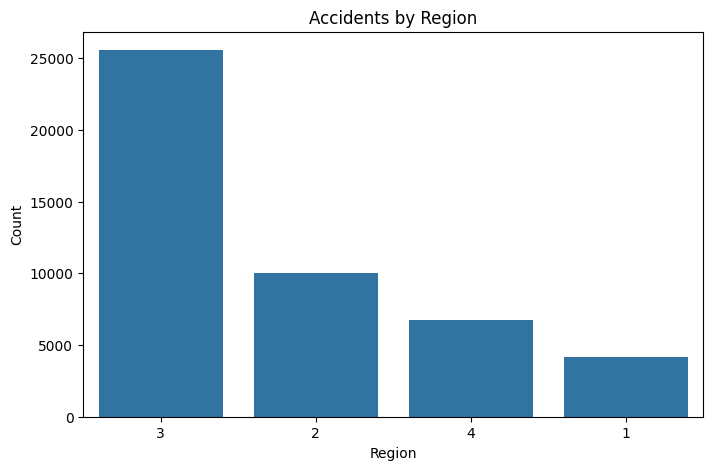

In [ ]:

if 'REGION' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='REGION', order=df['REGION'].value_counts().index)
    plt.title('Accidents by Region')
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.show()

# g.Pie chart of top 5 weather conditions

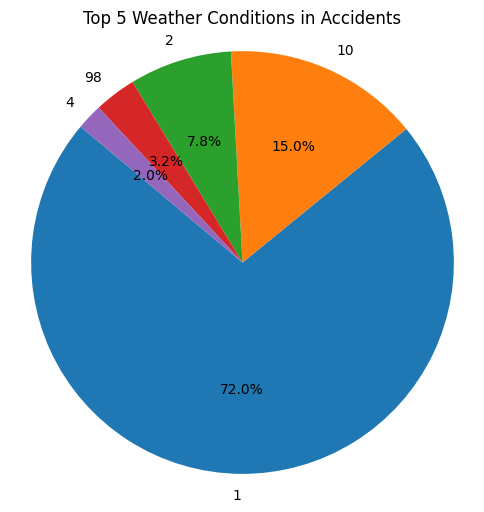

In [ ]:
if 'WEATHER1' in df.columns:
    top_weather = df['WEATHER1'].value_counts().nlargest(5)
    plt.figure(figsize=(6, 6))
    plt.pie(top_weather, labels=top_weather.index, autopct='%1.1f%%', startangle=140)
    plt.title('Top 5 Weather Conditions in Accidents')
    plt.axis('equal')
    plt.show()




# ✅ Conclusion: Traffic Accident Analysis
Through an extensive analysis of the traffic accident dataset, we derived several key insights:

**Time** **Patterns**:

A high number of accidents occur during peak traffic hours (7–9 AM and 4–6 PM), indicating commuting times as critical windows.

Weekdays, especially Fridays, witness a higher accident rate compared to weekends.

**Weather** **Conditions**:

Most accidents happen under clear weather, but severe outcomes are more common during rainy, foggy, or snowy conditions.

Weather still plays a crucial role in increasing the likelihood of serious accidents due to reduced visibility and road friction.

**Light** **Conditions**:

Accidents occur most frequently during daylight, but nighttime with no street lights correlates with higher severity, highlighting poor visibility as a critical risk factor.

**Severity** **Distribution**:

Majority of accidents fall under low to moderate severity, but a significant portion still causes injuries and fatalities, especially under poor weather and lighting conditions.

**Road Conditions**:

 Certain road types like intersections or junctions are more prone to accidents, especially with adverse weather and lighting.

# Recommendations:
Improve lighting infrastructure on highways and intersections to reduce night-time accident severity.

Enhance weather alert systems and educate drivers on safe driving practices in adverse conditions.

Focus law enforcement and road safety campaigns during peak hours and in high-risk regions.

Urban planning should consider accident-prone hotspots while designing roadways and pedestrian zones.